In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import sys

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
    #print(coordinate[0], coordinate[1])

56.412900937223895 -128.21694877999266
-5.767703804372928 -154.50967499818992
55.78462286316676 67.48906985426191
80.74878502670768 24.806888770036494
27.511272240347722 19.919199676067194
-34.52757689179924 -91.5823448009562
78.8912208969275 -63.90308851457304
17.71290728175167 70.15786703763891
-83.79399967673336 49.62161138463645
-19.521341372816224 30.9497248179523
-27.049165236508863 156.21021338169356
-50.966498210368755 -104.02764442440393
-67.80169960546374 -153.452525429514
-5.917560347659446 157.22698175046224
77.40143524809164 8.233416311212693
-57.658266646620774 -73.31540377354824
88.52796404233482 -7.027928920192608
20.6515256565055 -29.505193523502584
70.41799155156929 -36.85563835259751
32.852378496336726 58.116894758635254
35.79335605720034 106.83689807219798
-71.98790777326573 119.25258638926431
-7.575323818455118 -80.17504743234315
-72.99043856909142 -18.918359275614307
1.3669748688454604 -22.09404662740883
-19.87284299732616 98.21989269621002
3.549343797633469 -38.4

-30.049178851107577 -132.47392818758502
10.153395782407216 17.114212175231046
74.5278922009229 -67.10639897011585
-20.648818940127427 150.1644891963109
-1.0663077537266474 18.863019053215368
82.18089699802545 -113.71951544192501
1.574766119324778 -32.93378063784246
78.83770494521426 -141.37396141489623
50.002436847088575 156.46592717092886
-6.054255042483007 -7.5876799939158275
-70.02325140861699 50.78600738963985
32.67723089758482 -134.0493565812801
9.396545702905073 -1.839339065951492
85.91041348511584 6.83099357016269
-76.38642506067893 69.19862612980668
-21.71104547063115 -127.09972129962722
85.69941515462693 -127.34127303479048
-69.15190540209278 -64.32289095738923
-34.129573363601445 -132.4048435800422
21.62952034652244 116.33754906021812
89.54262363524529 123.50687353360405
38.79848668322677 -132.71104345172822
-9.911042240376716 -37.755256551738
-36.681050594680165 -165.32563812120563
9.429936740761761 47.81310494680429
6.9988684811664115 81.27376072423436
-48.17892425850913 11

-53.59763519287882 -137.72565350563718
34.730003325933254 -64.40820764447754
55.56807162873818 83.27612193389956
2.9448974503717125 107.47145659036232
-12.688002457017404 -125.42704219421796
-48.073091915883175 119.64765690578588
80.50083009652067 82.59388263538432
-18.892548357427785 -143.14017095059705
-35.692076983779664 -121.50057685145669
50.51424224285597 36.593686956032485
-63.596539264501715 -68.10560419588022
47.691969587803044 -152.5758715655278
56.764431450192376 86.72475172474043
49.33908539863563 -106.22054535947073
51.96531061499829 123.73017149954234
-68.0953819344338 -163.29968988391175
15.589156515653784 148.0748345378483
-78.76167787302394 71.53853806452634
59.61954351126565 118.80345429665829
75.63399413728396 -147.75575958280928
6.520674812698601 161.7941030551657
6.526286527328608 -174.5853315746979
1.3156207390590708 -169.38274340086517
21.789761522788993 -150.67287059187265
8.103917384361466 21.34112663255661
-11.236314556725631 125.65668650881611
80.088276663060

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ceafaa31fa4497aa86ed47f6ba9f25bd"



In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        print(f"{sys.exc_info()[0]} occurred.")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | terrace
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | armizonskoye
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | awjilah
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | narsaq
Processing Record 8 of Set 1 | murud
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | mvuma
Processing Record 11 of Set 1 | gold coast
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | kieta
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
<class 'KeyError'> occurred.
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
<class 'KeyError'> occurred.
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | birjand
Proces

Processing Record 26 of Set 4 | asfi
Processing Record 27 of Set 4 | los llanos de aridane
Processing Record 28 of Set 4 | cherskiy
Processing Record 29 of Set 4 | prata
Processing Record 30 of Set 4 | sao joaquim
Processing Record 31 of Set 4 | staryy krym
Processing Record 32 of Set 4 | bozoum
Processing Record 33 of Set 4 | wewak
Processing Record 34 of Set 4 | kuching
Processing Record 35 of Set 4 | hobyo
Processing Record 36 of Set 4 | iqaluit
Processing Record 37 of Set 4 | forset
City not found. Skipping...
<class 'KeyError'> occurred.
Processing Record 38 of Set 4 | kamenskoye
City not found. Skipping...
<class 'KeyError'> occurred.
Processing Record 39 of Set 4 | puerto el triunfo
Processing Record 40 of Set 4 | sumkino
Processing Record 41 of Set 4 | amderma
City not found. Skipping...
<class 'KeyError'> occurred.
Processing Record 42 of Set 4 | burgeo
Processing Record 43 of Set 4 | moose factory
Processing Record 44 of Set 4 | muscat
Processing Record 45 of Set 4 | careiro 

Processing Record 1 of Set 8 | hvammstangi
City not found. Skipping...
<class 'KeyError'> occurred.
Processing Record 2 of Set 8 | florianopolis
Processing Record 3 of Set 8 | pouebo
Processing Record 4 of Set 8 | haibowan
City not found. Skipping...
<class 'KeyError'> occurred.
Processing Record 5 of Set 8 | carutapera
Processing Record 6 of Set 8 | bousso
Processing Record 7 of Set 8 | mackay
Processing Record 8 of Set 8 | inongo
Processing Record 9 of Set 8 | aklavik
Processing Record 10 of Set 8 | severo-kurilsk
Processing Record 11 of Set 8 | half moon bay
Processing Record 12 of Set 8 | wa
City not found. Skipping...
<class 'KeyError'> occurred.
Processing Record 13 of Set 8 | jiazi
Processing Record 14 of Set 8 | tiksi
Processing Record 15 of Set 8 | monte alegre de sergipe
Processing Record 16 of Set 8 | garowe
Processing Record 17 of Set 8 | monaragala
Processing Record 18 of Set 8 | bonthe
Processing Record 19 of Set 8 | ifanadiana
Processing Record 20 of Set 8 | dunedin
Proc

Processing Record 31 of Set 11 | nemuro
Processing Record 32 of Set 11 | chicama
Processing Record 33 of Set 11 | priiskovyy
Processing Record 34 of Set 11 | inta
Processing Record 35 of Set 11 | yunyang
Processing Record 36 of Set 11 | kaabong
Processing Record 37 of Set 11 | kurbnesh
Processing Record 38 of Set 11 | aykhal
Processing Record 39 of Set 11 | lewisporte
Processing Record 40 of Set 11 | yamaga
Processing Record 41 of Set 11 | sodertalje
City not found. Skipping...
<class 'KeyError'> occurred.
Processing Record 42 of Set 11 | watsa
Processing Record 43 of Set 11 | agadez
Processing Record 44 of Set 11 | hongan
City not found. Skipping...
<class 'KeyError'> occurred.
Processing Record 45 of Set 11 | kathu
Processing Record 46 of Set 11 | groningen
Processing Record 47 of Set 11 | kalanguy
Processing Record 48 of Set 11 | niquelandia
Processing Record 49 of Set 11 | san quintin
Processing Record 50 of Set 11 | marzuq
Processing Record 1 of Set 12 | winchester
Processing Reco

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.columns


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [9]:
## reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Terrace,CA,2022-06-13 22:34:15,54.5163,-128.6035,60.71,51,75,10.36
1,Faanui,PF,2022-06-13 22:34:16,-16.4833,-151.7500,80.20,69,10,20.80
2,Armizonskoye,RU,2022-06-13 22:34:16,55.9461,67.6736,50.20,94,100,7.58
3,Longyearbyen,SJ,2022-06-13 22:34:17,78.2186,15.6401,40.84,70,75,3.44
4,Awjilah,LY,2022-06-13 22:34:17,29.1081,21.2869,75.16,52,0,13.87


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## STEM Project

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Get today's date in seconds.
today = time.time()
today

1655160623.394279

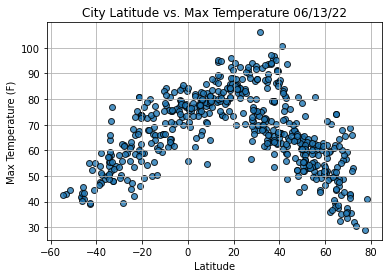

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

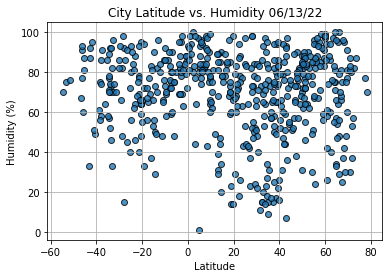

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

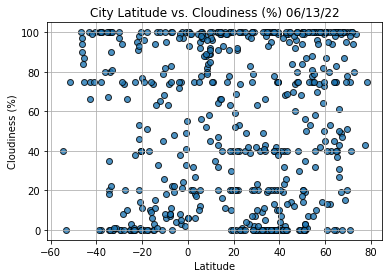

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

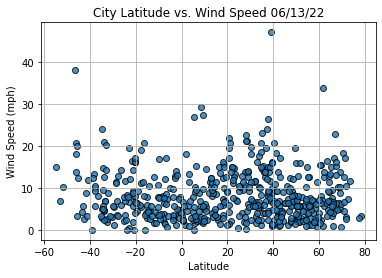

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()